<a href="https://colab.research.google.com/github/anabel-sha/LoanPrediction/blob/main/Data_Cleaning_%26_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Cleaning

Cleaning Rejected Loans File

In [ ]:
import pandas as pd

rejected_df = pd.read_csv('rejected_2007_to_2018Q4.csv.gz', compression='gzip')
print(rejected_df.shape)  # (rows, columns)

(27648741, 9)


In [ ]:
# Clean the "Debt-To-Income Ratio" column
rejected_df["Debt-To-Income Ratio"] = (
    rejected_df["Debt-To-Income Ratio"]
    .astype(str)
    .str.strip()
    .str.rstrip('%')
)

# Convert to numeric
rejected_df["Debt-To-Income Ratio"] = pd.to_numeric(rejected_df["Debt-To-Income Ratio"], errors="coerce")

In [ ]:
# Convert date column to datetime and format to "YYYY-MM"
rejected_df["Application Date"] = pd.to_datetime(rejected_df["Application Date"], errors="coerce")
rejected_df["Application Date"] = rejected_df["Application Date"].dt.to_period("M").astype(str)

In [ ]:
# Rename the first four columns
new_column_names = rejected_df.columns.tolist()  # Get the current column names
new_column_names[0] = 'loan_amnt'
new_column_names[1] = 'issue_or_application_date'
new_column_names[2] = 'purpose'
new_column_names[3] = 'fico_avg'
new_column_names[6] = 'addr_state'

# Apply the new column names
rejected_df.columns = new_column_names

In [ ]:
print(rejected_df.head(10))

   loan_amnt issue_or_application_date                           purpose  \
0     1000.0                   2007-05  Wedding Covered but No Honeymoon   
1     1000.0                   2007-05                Consolidating Debt   
2    11000.0                   2007-05       Want to consolidate my debt   
3     6000.0                   2007-05                           waksman   
4     1500.0                   2007-05                            mdrigo   
5    15000.0                   2007-05                        Trinfiniti   
6    10000.0                   2007-05                       NOTIFYi Inc   
7     3900.0                   2007-05                       For Justin.   
8     3000.0                   2007-05                            title?   
9     2500.0                   2007-05                          timgerst   

   fico_avg  Debt-To-Income Ratio Zip Code addr_state Employment Length  \
0     693.0                 10.00    481xx         NM           4 years   
1     703.0  

In [ ]:
# Replace empty strings with NaN so they are treated as missing values
rejected_df.replace('', pd.NA, inplace=True)

# Drop rows with any missing values
rejected_df = rejected_df.dropna()

In [ ]:
print(rejected_df.shape)  # (rows, columns)

(8992193, 9)


In [ ]:
rejected_df.to_csv('Rejected_Loans_6.11.25.csv.gz', index=False, compression='gzip')

In [ ]:
rejected_df = pd.read_csv('Rejected_Loans_6.11.25.csv.gz', compression='gzip', low_memory=False)
print(rejected_df.shape)  # (rows, columns)

(8992193, 9)


In [ ]:
print(rejected_df.head(20))

    loan_amnt issue_or_application_date  \
0      1000.0                   2007-05   
1      1000.0                   2007-05   
2     11000.0                   2007-05   
3      6000.0                   2007-05   
4      1500.0                   2007-05   
5     15000.0                   2007-05   
6     10000.0                   2007-05   
7      3900.0                   2007-05   
8      3000.0                   2007-05   
9      2500.0                   2007-05   
10     3900.0                   2007-05   
11     1000.0                   2007-05   
12     3000.0                   2007-05   
13     1500.0                   2007-05   
14     1000.0                   2007-05   
15     8000.0                   2007-05   
16    12000.0                   2007-05   
17     1000.0                   2007-05   
18    15000.0                   2007-05   
19     5000.0                   2007-05   

                                     purpose  fico_avg  Debt-To-Income Ratio  \
0           Wedd

In [ ]:
import re

# Accepted loan purpose categories
accepted_categories = [
    "car", "credit_card", "debt_consolidation", "educational", "home_improvement",
    "house", "major_purchase", "medical", "moving", "other", "renewable_energy",
    "small_business", "vacation", "wedding"
]

# Define keyword mapping to categories
keyword_map = {
    "car": ["car", "vehicle", "auto"],
    "credit_card": ["credit card", "cc", "creditcard"],
    "debt_consolidation": ["debt", "consolidate", "debt consolidation"],
    "educational": ["college", "school", "education", "tuition", "university", "master", "degree"],
    "home_improvement": ["home improvement", "remodel", "improvement", "renovation", "repair", "furnishing"],
    "house": ["house", "mortgage", "home loan"],
    "major_purchase": ["major purchase", "appliance", "computer", "electronics", "furniture"],
    "medical": ["medical", "doctor", "dental", "surgery", "treatment", "hospital"],
    "moving": ["move", "moving", "relocate"],
    "renewable_energy": ["solar", "renewable", "energy", "green"],
    "small_business": ["business", "startup", "company", "expand", "venture", "entrepreneur"],
    "vacation": ["vacation", "holiday", "trip", "travel"],
    "wedding": ["wedding", "marriage", "honeymoon"]
}

def categorize_purpose(text):
    if not isinstance(text, str):
        return "other"
    # Clean and normalize
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower()).strip()

    for category, keywords in keyword_map.items():
        for kw in keywords:
            if kw in clean_text:
                return category
    return "other"

# Apply categorization to the dataset
rejected_df["purpose"] = rejected_df["purpose"].apply(categorize_purpose)

# Show results summary
rejected_df["purpose"].value_counts()

,count
purpose,
debt_consolidation,4168474
other,1700901
car,1605584
home_improvement,409246
medical,275793
moving,254912
small_business,238051
major_purchase,128597
vacation,101232


In [ ]:
print(rejected_df.head())

   loan_amnt issue_or_application_date             purpose  fico_avg  \
0     1000.0                   2007-05             wedding     693.0   
1     1000.0                   2007-05  debt_consolidation     703.0   
2    11000.0                   2007-05  debt_consolidation     715.0   
3     6000.0                   2007-05               other     698.0   
4     1500.0                   2007-05               other     509.0   

   Debt-To-Income Ratio Zip Code addr_state Employment Length  Policy Code  
0                 10.00    481xx         NM           4 years          0.0  
1                 10.00    010xx         MA          < 1 year          0.0  
2                 10.00    212xx         MD            1 year          0.0  
3                 38.64    017xx         MA          < 1 year          0.0  
4                  9.43    209xx         MD          < 1 year          0.0  


In [ ]:
rejected_df.to_csv('Rejected_Loans_Clean_6.11.25.csv.gz', index=False, compression='gzip')

In [ ]:
rejected_df = pd.read_csv('Rejected_Loans_Clean_6.11.25.csv.gz', compression='gzip', low_memory=False)
print(rejected_df.shape)  # (rows, columns)

(8992193, 9)


In [ ]:
# Look at unique values in the 'issue_or_application_date' column
unique_values = rejected_df['issue_or_application_date'].unique()

# Print them all
for val in unique_values:
    print(repr(val))  # repr() helps show None, NaN, and whitespace clearly

# Optional: also get the count of each unique value
value_counts = rejected_df['issue_or_application_date'].value_counts(dropna=False)

print("\n--- Value Counts ---")
print(value_counts)

'2007-05'
'2007-06'
'2007-07'
'2007-08'
'2007-09'
'2007-10'
'2007-11'
'2007-12'
'2008-01'
'2008-02'
'2008-03'
'2008-04'
'2008-05'
'2008-06'
'2008-07'
'2008-08'
'2008-09'
'2008-10'
'2008-11'
'2008-12'
'2009-01'
'2009-02'
'2009-03'
'2009-04'
'2009-05'
'2009-06'
'2009-07'
'2009-08'
'2009-09'
'2009-10'
'2009-11'
'2009-12'
'2010-01'
'2010-02'
'2010-03'
'2010-04'
'2010-05'
'2010-06'
'2010-07'
'2010-08'
'2010-09'
'2010-10'
'2010-11'
'2010-12'
'2011-01'
'2011-02'
'2011-03'
'2011-04'
'2011-05'
'2011-06'
'2011-07'
'2011-08'
'2011-09'
'2011-10'
'2011-11'
'2011-12'
'2012-01'
'2012-02'
'2012-03'
'2012-04'
'2012-05'
'2012-06'
'2012-07'
'2012-08'
'2012-09'
'2012-10'
'2012-11'
'2012-12'
'2016-04'
'2016-05'
'2016-06'
'2016-07'
'2016-08'
'2016-09'
'2017-01'
'2017-02'
'2017-03'
'2018-07'
'2018-08'
'2018-09'
'2013-01'
'2013-02'
'2013-03'
'2013-04'
'2013-05'
'2013-06'
'2013-07'
'2013-08'
'2013-09'
'2013-10'
'2013-11'
'2013-12'
'2014-01'
'2014-02'
'2014-03'
'2014-04'
'2014-05'
'2014-06'
'2014-07'
'2014-08'


Cleaning Approved Loans File

In [ ]:
import pandas as pd

accepted_df = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression='gzip', low_memory=False)
print(accepted_df.shape)  # (rows, columns)

(2260701, 151)


In [ ]:
from openpyxl.utils import column_index_from_string

columns_to_delete = [
    'B', 'S', 'T', 'V', 'AE', 'AF', 'AX', 'BC', 'BF', 'BG', 'BH',
    'CM', 'CO', 'DL', 'DM', 'DN', 'DO', 'DP', 'DQ', 'DR', 'DS', 'DT',
    'DU', 'DV', 'DW', 'DX', 'DZ', 'EA', 'EB', 'EC', 'ED', 'EE', 'EF',
    'EG', 'EH', 'EI', 'EJ', 'EK', 'EL', 'EM', 'EP', 'EQ', 'ER', 'ES',
    'ET', 'EU'
]

# Convert Excel-style letters to zero-based column indices
cols_to_drop_idx = [column_index_from_string(col) - 1 for col in columns_to_delete]

# Get column names based on their positions in the DataFrame
cols_to_drop = [accepted_df.columns[i] for i in cols_to_drop_idx if i < len(accepted_df.columns)]

# Drop columns
accepted_df = accepted_df.drop(columns=cols_to_drop)

In [ ]:
# Dictionary mapping old column names to new ones
rename_map = {
    "emp_length": "Employment Length",
    "dti": "Debt-To-Income Ratio",
    "issue_d": "issue_or_application_date",
    "zip_code": "Zip Code"
}

# Rename the columns
accepted_df = accepted_df.rename(columns=rename_map)

In [ ]:
# Add 2 to each value in the 'fico_range_low' column
accepted_df["fico_range_low"] = accepted_df["fico_range_low"] + 2

# Drop the 'fico_range_high' column
accepted_df = accepted_df.drop(columns=["fico_range_high"])

# Rename the column
accepted_df = accepted_df.rename(columns={"fico_range_low": "fico_avg"})

In [ ]:
# Print all column names
print(accepted_df.columns.tolist())

['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'Employment Length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_or_application_date', 'loan_status', 'pymnt_plan', 'purpose', 'Zip Code', 'addr_state', 'Debt-To-Income Ratio', 'delinq_2yrs', 'earliest_cr_line', 'fico_avg', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_b

In [ ]:
# List of columns to reformat
date_columns = [
    "issue_or_application_date",
    "earliest_cr_line",
    "last_pymnt_d",
    "last_credit_pull_d"
]

# Convert and reformat each column
for col in date_columns:
    accepted_df[col] = pd.to_datetime(accepted_df[col], errors='coerce').dt.strftime('%Y-%m')

<ipython-input-11-2770941780>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accepted_df[col] = pd.to_datetime(accepted_df[col], errors='coerce').dt.strftime('%Y-%m')
<ipython-input-11-2770941780>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accepted_df[col] = pd.to_datetime(accepted_df[col], errors='coerce').dt.strftime('%Y-%m')
<ipython-input-11-2770941780>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accepted_df[col] = pd.to_datetime(accepted_df[col], errors='coerce').dt.strftime('%Y-%m')
<ipython-input-11-2770941780>:11: UserWarning: Could not infer format,

In [ ]:
print(accepted_df[date_columns].head())

  issue_or_application_date earliest_cr_line last_pymnt_d last_credit_pull_d
0                   2015-12          2003-08      2019-01            2019-03
1                   2015-12          1999-12      2016-06            2019-03
2                   2015-12          2000-08      2017-06            2019-03
3                   2015-12          2008-09      2019-02            2019-03
4                   2015-12          1998-06      2016-07            2018-03


In [ ]:
# List of columns to check for missing values
required_columns = [
    "loan_amnt",
    "issue_or_application_date",
    "purpose",
    "fico_avg",
    "Debt-To-Income Ratio",
    "Zip Code",
    "addr_state",
    "Employment Length"
]

# Drop rows with NaN in any of the specified columns
accepted_df = accepted_df.dropna(subset=required_columns)

print(accepted_df.shape)  # (rows, columns)

(2113647, 104)


In [ ]:
# Look at unique values in the 'issue_or_application_date' column
unique_values = accepted_df['issue_or_application_date'].unique()

# Print all unique values clearly
for val in unique_values:
    print(repr(val))  # Shows actual content including None, NaN, or whitespace

# Optional: also get the count of each unique value
value_counts = accepted_df['issue_or_application_date'].value_counts(dropna=False)

print("\n--- Value Counts ---")
print(value_counts)

'2015-12'
'2015-11'
'2015-10'
'2015-09'
'2015-08'
'2015-07'
'2015-06'
'2015-05'
'2015-04'
'2015-03'
'2015-02'
'2015-01'
'2018-03'
'2018-02'
'2018-01'
'2017-09'
'2017-08'
'2017-07'
'2016-06'
'2016-05'
'2016-04'
'2018-09'
'2018-08'
'2018-07'
'2017-06'
'2017-05'
'2017-04'
'2016-03'
'2016-02'
'2016-01'
'2014-12'
'2014-11'
'2014-10'
'2014-09'
'2014-08'
'2014-07'
'2014-06'
'2014-05'
'2014-04'
'2014-03'
'2014-02'
'2014-01'
'2018-12'
'2018-11'
'2018-10'
'2018-06'
'2018-05'
'2018-04'
'2011-12'
'2011-11'
'2011-10'
'2011-09'
'2011-08'
'2011-07'
'2011-06'
'2011-05'
'2011-04'
'2011-03'
'2011-02'
'2011-01'
'2010-12'
'2010-11'
'2010-10'
'2010-09'
'2010-08'
'2010-07'
'2010-06'
'2010-05'
'2010-04'
'2010-03'
'2010-02'
'2010-01'
'2009-12'
'2009-11'
'2009-10'
'2009-09'
'2009-08'
'2009-07'
'2009-06'
'2009-05'
'2009-04'
'2009-03'
'2009-02'
'2009-01'
'2008-12'
'2008-11'
'2008-10'
'2008-09'
'2008-08'
'2008-07'
'2008-06'
'2008-05'
'2008-04'
'2008-03'
'2008-02'
'2008-01'
'2007-12'
'2007-11'
'2007-10'
'2007-09'


In [ ]:
# Save
accepted_df.to_csv('Accepted_Loans_Clean_6.11.25.csv.gz', index=False, compression='gzip')

In [ ]:
import pandas as pd

accepted_df = pd.read_csv('Accepted_Loans_Clean_6.11.25.csv.gz', compression='gzip', low_memory=False)
print(accepted_df.shape)  # (rows, columns)

(2113647, 104)


In [ ]:
# List unique values in the 'purpose' column
unique_purposes = accepted_df['purpose'].dropna().unique()

# Sort them for readability
unique_purposes = sorted(unique_purposes)

# Print results
print("✅ Unique values in 'purpose' column:")
for purpose in unique_purposes:
    print("-", purpose)

✅ Unique values in 'purpose' column:
- car
- credit_card
- debt_consolidation
- educational
- home_improvement
- house
- major_purchase
- medical
- moving
- other
- renewable_energy
- small_business
- vacation
- wedding


In [ ]:
print(accepted_df["purpose"].head(10))

0    debt_consolidation
1        small_business
2      home_improvement
3    debt_consolidation
4        major_purchase
5    debt_consolidation
6    debt_consolidation
7        major_purchase
8           credit_card
9           credit_card
Name: purpose, dtype: object


Editing FRED Data

In [ ]:
!pip install pandas openpyxl
import pandas as pd

In [ ]:
# Load the Excel file
file_path = 'Consumer Price Index.xlsx'
df = pd.read_excel(file_path)

# Convert the 'issue_or_application_date' column to datetime and reformat
df['issue_or_application_date'] = pd.to_datetime(
    df['issue_or_application_date'], format='%m/%d/%Y', errors='coerce'
).dt.strftime('%Y-%m')

# Save the updated DataFrame back to Excel
output_file_path = 'Consumer Price Index 6.6.25.xlsx'  # Name for the output file
df.to_excel(output_file_path, index=False)

print(f"Updated Excel file saved as: {output_file_path}")

Updated Excel file saved as: Consumer Price Index 6.6.25.xlsx


Combining accepted and rejected

In [ ]:
import pandas as pd

# Load your datasets
accepted_df = pd.read_csv('Accepted_Loans_Clean_6.11.25.csv.gz', compression='gzip', low_memory=False)
rejected_df = pd.read_csv('Rejected_Loans_Clean_6.11.25.csv.gz', compression='gzip', low_memory=False)

In [ ]:
print(accepted_df.shape)  # (rows, columns)

(2113647, 104)


In [ ]:
print(rejected_df.shape)  # (rows, columns)

(8992193, 9)


In [ ]:
#changes the column "policy_code" from the accepted_df to "Policy Code"

accepted_df.rename(columns={"policy_code": "Policy Code"}, inplace=True)
print(accepted_df.columns.tolist())

['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'Employment Length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_or_application_date', 'loan_status', 'pymnt_plan', 'purpose', 'Zip Code', 'addr_state', 'Debt-To-Income Ratio', 'delinq_2yrs', 'earliest_cr_line', 'fico_avg', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'Policy Code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_b

In [ ]:
# Step 1: Make all column names lowercase for consistency
accepted_df.columns = accepted_df.columns.str.lower()
rejected_df.columns = rejected_df.columns.str.lower()

# Step 2: Add label to distinguish accepted vs rejected
# This avoids a second 'loan_status' if one already existed
accepted_df['loan_status'] = 'accepted'
rejected_df['loan_status'] = 'rejected'

# Step 3: Identify shared columns
common_columns = list(set(accepted_df.columns).intersection(rejected_df.columns))

# Step 4: Ensure only one 'loan_status' column is included
if 'loan_status' in common_columns:
    common_columns.remove('loan_status')

# Step 5: Subset both DataFrames to shared columns + 'loan_status'
accepted_subset = accepted_df[common_columns + ['loan_status']]
rejected_subset = rejected_df[common_columns + ['loan_status']]

# Step 6: Combine datasets
combined_df = pd.concat([accepted_subset, rejected_subset], ignore_index=True)

# Step 7: Drop any duplicate columns (if any slipped through)
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

# Step 8: Save to CSV
# combined_df.to_csv("Combined_Loan_Data_6.9.25.csv", index=False)

# Final check
print(f"✅ Combined data shape: {combined_df.shape[0]} rows × {combined_df.shape[1]} columns")
print(combined_df.head(10))

✅ Combined data shape: 11105840 rows × 10 columns
  employment length issue_or_application_date addr_state  \
0         10+ years                   2015-12         PA   
1         10+ years                   2015-12         SD   
2         10+ years                   2015-12         IL   
3         10+ years                   2015-12         NJ   
4           3 years                   2015-12         PA   
5           4 years                   2015-12         GA   
6         10+ years                   2015-12         MN   
7         10+ years                   2015-12         SC   
8           6 years                   2015-12         PA   
9         10+ years                   2015-12         RI   

   debt-to-income ratio zip code             purpose  fico_avg  policy code  \
0                  5.91    190xx  debt_consolidation     677.0          1.0   
1                 16.06    577xx      small_business     717.0          1.0   
2                 10.78    605xx    home_improvement

In [ ]:
combined_df.to_csv('Combined_Loans_Clean_6.11.25.csv.gz', index=False, compression='gzip')

In [ ]:
combined_df = pd.read_csv('Combined_Loans_Clean_6.11.25.csv.gz', compression='gzip', low_memory=False)
print(combined_df.head())

  employment length issue_or_application_date addr_state  \
0         10+ years                   2015-12         PA   
1         10+ years                   2015-12         SD   
2         10+ years                   2015-12         IL   
3         10+ years                   2015-12         NJ   
4           3 years                   2015-12         PA   

   debt-to-income ratio zip code             purpose  fico_avg  policy code  \
0                  5.91    190xx  debt_consolidation     677.0          1.0   
1                 16.06    577xx      small_business     717.0          1.0   
2                 10.78    605xx    home_improvement     697.0          1.0   
3                 17.06    076xx  debt_consolidation     787.0          1.0   
4                 25.37    174xx      major_purchase     697.0          1.0   

   loan_amnt loan_status  
0     3600.0    accepted  
1    24700.0    accepted  
2    20000.0    accepted  
3    35000.0    accepted  
4    10400.0    accepted  


Combining FRED Data with Combined Loan Data

In [ ]:
import pandas as pd

# Load combined loan data
loans_df = pd.read_csv('Combined_Loans_Clean_6.11.25.csv.gz', compression='gzip', low_memory=False)

# Load FRED data
eff_rate = pd.read_excel("Federal Funds Effective Rate 6.6.25.xlsx")  # columns: date, eff_rate
unemp_rate = pd.read_excel("Unemployment Rate 6.6.25.xlsx")            # columns: date, unemp_rate
cpi_data = pd.read_excel("Consumer Price Index 6.6.25.xlsx")           # columns: date, cpi

In [ ]:
print(loans_df.shape)  # (rows, columns)

(11105840, 10)


In [ ]:
# Merge the FRED datasets into a single DataFrame
fred_df = eff_rate.merge(unemp_rate, on="issue_or_application_date").merge(cpi_data, on="issue_or_application_date")

# Merge loan data with macroeconomic indicators
merged_df = loans_df.merge(fred_df, on="issue_or_application_date", how="left")

print(f"✅ Final dataset saved: {merged_df.shape[0]} rows × {merged_df.shape[1]} columns")
print(merged_df.head(10))

✅ Final dataset saved: 11105840 rows × 13 columns
  employment length issue_or_application_date addr_state  \
0         10+ years                   2015-12         PA   
1         10+ years                   2015-12         SD   
2         10+ years                   2015-12         IL   
3         10+ years                   2015-12         NJ   
4           3 years                   2015-12         PA   
5           4 years                   2015-12         GA   
6         10+ years                   2015-12         MN   
7         10+ years                   2015-12         SC   
8           6 years                   2015-12         PA   
9         10+ years                   2015-12         RI   

   debt-to-income ratio zip code             purpose  fico_avg  policy code  \
0                  5.91    190xx  debt_consolidation     677.0          1.0   
1                 16.06    577xx      small_business     717.0          1.0   
2                 10.78    605xx    home_improvement

In [ ]:
# Step 2: Standardize column names
merged_df.columns = merged_df.columns.str.lower().str.replace(" ", "_")

# Step 3: Define a function to clean 'employment_length'
def clean_employment_length(val):
    if pd.isna(val):
        return np.nan
    val = val.lower().strip()
    if val == 'n/a':
        return np.nan
    elif '<' in val:
        return 0.5
    elif '10+' in val:
        return 10
    else:
        digits = ''.join([c for c in val if c.isdigit()])
        return int(digits) if digits else np.nan

# Step 4: Apply cleaning function
merged_df['employment_length'] = merged_df['employment_length'].apply(clean_employment_length)

print("✅ Employment length cleaned")
print(merged_df.head(10))

✅ Employment length cleaned
   employment_length issue_or_application_date addr_state  \
0               10.0                   2015-12         PA   
1               10.0                   2015-12         SD   
2               10.0                   2015-12         IL   
3               10.0                   2015-12         NJ   
4                3.0                   2015-12         PA   
5                4.0                   2015-12         GA   
6               10.0                   2015-12         MN   
7               10.0                   2015-12         SC   
8                6.0                   2015-12         PA   
9               10.0                   2015-12         RI   

   debt-to-income_ratio zip_code             purpose  fico_avg  policy_code  \
0                  5.91    190xx  debt_consolidation     677.0          1.0   
1                 16.06    577xx      small_business     717.0          1.0   
2                 10.78    605xx    home_improvement     697.0 

In [ ]:
merged_df.to_csv('Merged_Data_Clean_6.11.25.csv.gz', index=False, compression='gzip')

# Modeling

# Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import numpy as np

df = pd.read_csv('Merged_Data_Clean_6.11.25.csv.gz', compression='gzip', low_memory=False)
print(df.shape)
print(df.head(10))

(11105840, 13)
   employment_length issue_or_application_date addr_state  \
0               10.0                   2015-12         PA   
1               10.0                   2015-12         SD   
2               10.0                   2015-12         IL   
3               10.0                   2015-12         NJ   
4                3.0                   2015-12         PA   
5                4.0                   2015-12         GA   
6               10.0                   2015-12         MN   
7               10.0                   2015-12         SC   
8                6.0                   2015-12         PA   
9               10.0                   2015-12         RI   

   debt-to-income_ratio zip_code             purpose  fico_avg  policy_code  \
0                  5.91    190xx  debt_consolidation     677.0          1.0   
1                 16.06    577xx      small_business     717.0          1.0   
2                 10.78    605xx    home_improvement     697.0          1.0 

In [ ]:
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == "accepted" else 0)

In [ ]:
# Select features for the model
features = [
    'addr_state',
    'debt-to-income_ratio',
    'employment_length',
    'fico_avg',
    'loan_amnt',
    'purpose',
    'fed_fund_effective_rate',
    'unemployment_rate',
    'consumer_price_index'
]

X = df[features]
y = df['loan_status']

In [ ]:
categorical_features = ['addr_state', 'purpose']
numeric_features = [
    'debt-to-income_ratio',
    'fico_avg',
    'loan_amnt',
    'fed_fund_effective_rate',
    'unemployment_rate',
    'consumer_price_index',
    'employment_length'
]

In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numeric_features)
])

# Full pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [ ]:
# Perform 10-fold cross-validation using stratified folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# 10-Fold Accuracy Scores
print("Performing 10-fold cross-validation...\n")
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print(f"Cross-validated Accuracy Scores (10 folds): {accuracy_scores}")
print(f"Mean Accuracy: {accuracy_scores.mean():.4f}")
print(f"Standard Deviation: {accuracy_scores.std():.4f}")

Performing 10-fold cross-validation...

Cross-validated Accuracy Scores (10 folds): [0.91494385 0.91475386 0.91530132 0.91570831 0.91488622 0.91468092
 0.91493845 0.91558495 0.91538416 0.91577494]
Mean Accuracy: 0.9152
Standard Deviation: 0.0004


In [ ]:
# Full Classification Report from CV Predictions
print("\nGenerating classification report from cross-validated predictions...\n")
y_pred_cv = cross_val_predict(model, X, y, cv=cv)
print(classification_report(y, y_pred_cv, target_names=["Rejected", "Accepted"]))


Generating classification report from cross-validated predictions...

              precision    recall  f1-score   support

    Rejected       0.93      0.97      0.95   8992193
    Accepted       0.84      0.69      0.76   2113647

    accuracy                           0.92  11105840
   macro avg       0.88      0.83      0.85  11105840
weighted avg       0.91      0.92      0.91  11105840



#Logistic Regression to find important variable

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df = pd.read_csv('Merged_Data_Clean_6.11.25.csv.gz', compression='gzip', low_memory=False)

In [ ]:
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == "accepted" else 0)

# Feature list
features = [
    'addr_state',
    'debt-to-income_ratio',
    'employment_length',
    'fico_avg',
    'loan_amnt',
    'purpose',
    'fed_fund_effective_rate',
    'unemployment_rate',
    'consumer_price_index'
]

X = df[features]
y = df['loan_status']

# Define categorical and numerical features
categorical_features = ['addr_state', 'purpose']
numeric_features = [
    'debt-to-income_ratio',
    'fico_avg',
    'loan_amnt',
    'fed_fund_effective_rate',
    'unemployment_rate',
    'consumer_price_index',
    'employment_length'
]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Preprocessing Transformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numeric_features)
])

In [ ]:
# Fit the preprocessor separately to get feature names
preprocessor.fit(X_train)

# Get transformed feature names
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([cat_feature_names, numeric_features])

In [ ]:
# Define Full Pipeline with Standard Logistic Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        penalty=None,
        solver='saga',
        max_iter=500,
        random_state=42,
        verbose=1
    ))
])

In [ ]:
model.fit(X_train, y_train)

max_iter reached after 5883 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 98.0min finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['addr_state', 'purpose']),
                                                 ('num', StandardScaler(),
                                                  ['debt-to-income_ratio',
                                                   'fico_avg', 'loan_amnt',
                                                   'fed_fund_effective_rate',
                                                   'unemployment_rate',
                                                   'consumer_price_index',
                                                   'employment_length'])])),
                ('classifier',
                 LogisticRegression(max_iter=500, penalty=None, random_state=42,
                                    solver='saga', verbose=1))])

In [ ]:
coefficients = model.named_steps['classifier'].coef_[0]

In [ ]:
coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

In [ ]:
print("\nTop 10 Most Important Variables (by coefficient magnitude):\n")
print(coef_df_sorted.head(10))


Top 10 Most Important Variables (by coefficient magnitude):

                       Feature  Coefficient  Abs_Coefficient
51                 purpose_car    -4.527258         4.527258
60               purpose_other    -2.857044         2.857044
52         purpose_credit_card     2.856886         2.856886
62      purpose_small_business    -2.164446         2.164446
58             purpose_medical    -1.988450         1.988450
59              purpose_moving    -1.780916         1.780916
55    purpose_home_improvement    -1.670440         1.670440
66                    fico_avg     1.454952         1.454952
53  purpose_debt_consolidation    -1.421716         1.421716
63            purpose_vacation    -1.369264         1.369264


# LightGBM

In [ ]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('Merged_Data_Clean_6.11.25.csv.gz', compression='gzip', low_memory=False)

df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == "accepted" else 0)

features = [
    'addr_state', 'debt-to-income_ratio', 'employment_length', 'fico_avg',
    'loan_amnt', 'purpose', 'fed_fund_effective_rate',
    'unemployment_rate', 'consumer_price_index'
]

X = df[features]
y = df['loan_status']

categorical_features = ['addr_state', 'purpose']
numeric_features = [f for f in X.columns if f not in categorical_features]

In [ ]:
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

/tmp/ipython-input-49-3838227663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_features] = scaler.fit_transform(X[numeric_features])


In [ ]:
for col in categorical_features:
    X[col] = X[col].astype('category')

/tmp/ipython-input-50-517480899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
/tmp/ipython-input-50-517480899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')


In [ ]:
# Define the LightGBM model
clf = LGBMClassifier(
    n_estimators=100,
    max_depth=8,
    learning_rate=0.1,
    n_jobs=-1,
    random_state=42
)

In [ ]:
# Use Stratified K-Fold for consistent class distribution across folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
print("Performing 10-fold cross-validation...\n")
accuracy_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
print(f"Cross-validated Accuracy Scores (10 folds): {accuracy_scores}")
print(f"Mean Accuracy: {accuracy_scores.mean():.4f}")
print(f"Standard Deviation: {accuracy_scores.std():.4f}")

Performing 10-fold cross-validation...

[LightGBM] [Info] Number of positive: 1902282, number of negative: 8092974
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.316034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1097
[LightGBM] [Info] Number of data points in the train set: 9995256, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.190318 -> initscore=-1.447942
[LightGBM] [Info] Start training from score -1.447942
[LightGBM] [Info] Number of positive: 1902282, number of negative: 8092974
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.292786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1097
[LightGBM] [Info] Number of data points in the train set: 9995

In [ ]:
print("\nGenerating classification report from cross-validated predictions...\n")
y_pred_cv = cross_val_predict(clf, X, y, cv=cv)
print(classification_report(y, y_pred_cv, target_names=["Rejected", "Accepted"]))


Generating classification report from cross-validated predictions...

[LightGBM] [Info] Number of positive: 1902282, number of negative: 8092974
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.577929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1097
[LightGBM] [Info] Number of data points in the train set: 9995256, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.190318 -> initscore=-1.447942
[LightGBM] [Info] Start training from score -1.447942
[LightGBM] [Info] Number of positive: 1902282, number of negative: 8092974
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.295749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1097
[LightGBM] [Info] Number of dat

#LightGBM to find important variable

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from lightgbm import LGBMClassifier

df = pd.read_csv('Merged_Data_Clean_6.11.25.csv.gz', compression='gzip', low_memory=False)

df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == "accepted" else 0)

In [ ]:
features = [
    'addr_state',
    'debt-to-income_ratio',
    'employment_length',
    'fico_avg',
    'loan_amnt',
    'purpose',
    'fed_fund_effective_rate',
    'unemployment_rate',
    'consumer_price_index'
]

X = df[features]
y = df['loan_status']

categorical_features = ['addr_state', 'purpose']
numeric_features = [
    'debt-to-income_ratio',
    'fico_avg',
    'loan_amnt',
    'fed_fund_effective_rate',
    'unemployment_rate',
    'consumer_price_index',
    'employment_length'
]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numeric_features)
])

In [ ]:
X_train_transformed = preprocessor.fit_transform(X_train)

In [ ]:
# Get feature names from encoder
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([cat_feature_names, numeric_features])

In [ ]:
# Train
lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

In [ ]:
lgbm.fit(X_train_transformed, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1690918, number of negative: 7193754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.235413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 8884672, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.190319 -> initscore=-1.447942
[LightGBM] [Info] Start training from score -1.447942


LGBMClassifier(max_depth=6, n_jobs=-1, random_state=42)

In [ ]:
# Get Feature Importances
importances = lgbm.feature_importances_

In [ ]:
# Combine into DataFrame
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features (LightGBM):\n")
print(importance_df.head(10))


Top 10 Most Important Features (LightGBM):

                       Feature  Importance
66                    fico_avg         766
67                   loan_amnt         433
70        consumer_price_index         390
65        debt-to-income_ratio         363
71           employment_length         307
68     fed_fund_effective_rate         225
69           unemployment_rate         168
52         purpose_credit_card         114
51                 purpose_car          87
53  purpose_debt_consolidation          63


# Multilayer Perceptron - Neural Network

In [ ]:
!pip install scikeras -qqq

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# Load the data
df = pd.read_csv('Merged_Data_Clean_6.11.25.csv.gz', compression='gzip', low_memory=False)
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'accepted' else 0)

In [ ]:
# Define features and target
features = [
    'addr_state', 'debt-to-income_ratio', 'employment_length', 'fico_avg',
    'loan_amnt', 'purpose', 'fed_fund_effective_rate',
    'unemployment_rate', 'consumer_price_index'
]
X = df[features]
y = df['loan_status'].values

In [ ]:
# Define categorical and numeric features
categorical_features = ['addr_state', 'purpose']
numeric_features = [col for col in X.columns if col not in categorical_features]

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numeric_features)
])

In [ ]:
# MLP model builder
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
print("\nRunning MLP on 80/20 split with 10% sampled data for memory efficiency...\n")

# Split the data (stratified to maintain class distribution)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


Running MLP on 80/20 split with 10% sampled data for memory efficiency...



In [ ]:
from scipy.sparse import csr_matrix

# Transform features without converting to dense directly
X_train_proc = preprocessor.fit_transform(X_train_raw)
X_test_proc = preprocessor.transform(X_test_raw)

# Convert sparse to dense more efficiently
X_train_proc = X_train_proc.astype(np.float32).todense()
X_test_proc = X_test_proc.astype(np.float32).todense()

In [ ]:
# Build and train model with smaller batch size
model = build_model(input_dim=X_train_proc.shape[1])
model.fit(X_train_proc, y_train, epochs=5, batch_size=512, verbose=0)  # Reduced batch size

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Predict and evaluate
y_pred_probs = model.predict(X_test_proc, verbose=0)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Rejected", "Accepted"]))


Test Accuracy: 0.9628

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.98      0.98      0.98   1798439
    Accepted       0.90      0.91      0.90    422729

    accuracy                           0.96   2221168
   macro avg       0.94      0.94      0.94   2221168
weighted avg       0.96      0.96      0.96   2221168



# Unsupervised Learning

# Elbow Method

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Merged_Data_Clean_6.11.25.csv.gz', compression='gzip', low_memory=False)

In [ ]:
# Define features (excluding target variable 'loan_status')
features = [
    'addr_state', 'debt-to-income_ratio', 'employment_length', 'fico_avg',
    'loan_amnt', 'purpose', 'fed_fund_effective_rate',
    'unemployment_rate', 'consumer_price_index'
]

X = df[features]
y = df['loan_status']

# Categorical features
categorical_features = ['addr_state', 'purpose']
numeric_features = [f for f in X.columns if f not in categorical_features]

In [ ]:
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# One-hot encode categorical variables (since KMeans requires numerical input)
X = pd.get_dummies(X, drop_first=True)

# Elbow Method using MiniBatchKMeans to find the optimal number of clusters
inertia = []
max_k = 10

/tmp/ipython-input-3-2242950279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_features] = scaler.fit_transform(X[numeric_features])


In [ ]:
batch_size = 500

minibatch_kmeans = MiniBatchKMeans(n_clusters=1, random_state=42, batch_size=batch_size, n_init=1)

In [ ]:
# Process each k from 1 to max_k in chunks
for k in range(1, max_k + 1):
    # Reset the KMeans object for each value of k
    minibatch_kmeans.set_params(n_clusters=k)

    # Initialize an array to store the inertia for each batch
    inertia_for_k = []

    # Loop through data in chunks (using batches)
    for i in range(0, len(X), batch_size):
        # Take a slice of the dataset (batch) for incremental fitting
        X_batch = X.iloc[i:i + batch_size]

        # Incrementally fit the model on this batch
        minibatch_kmeans.partial_fit(X_batch)

        # Compute inertia for this batch
        inertia_for_k.append(minibatch_kmeans.inertia_)

    # Average the inertia for this value of k
    inertia.append(np.mean(inertia_for_k))

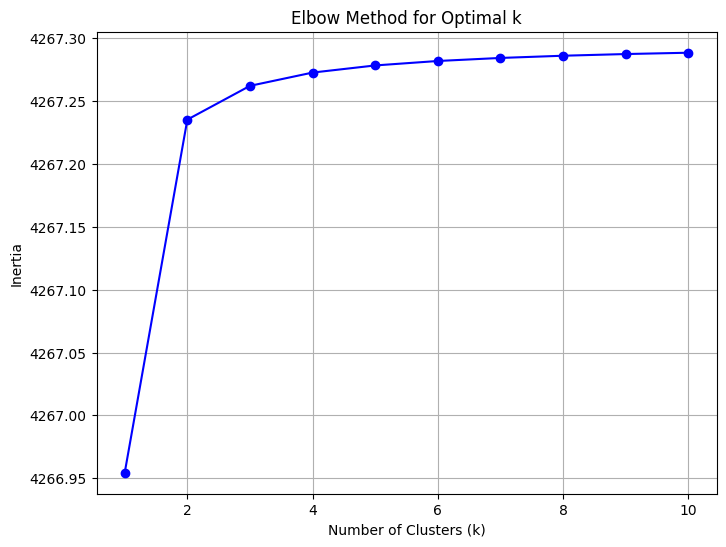

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), inertia, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Silhouette Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Merged_Data_Clean_6.11.25.csv.gz', compression='gzip', low_memory=False)

features = [
    'addr_state', 'debt-to-income_ratio', 'employment_length', 'fico_avg',
    'loan_amnt', 'purpose', 'fed_fund_effective_rate',
    'unemployment_rate', 'consumer_price_index'
]

In [ ]:
X = df[features]
y = df['loan_status']

categorical_features = ['addr_state', 'purpose']
numeric_features = [col for col in X.columns if col not in categorical_features]

scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

X = pd.get_dummies(X, drop_first=True)

/tmp/ipython-input-3-434450989.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_features] = scaler.fit_transform(X[numeric_features])


In [ ]:
# To save memory
X = X.astype(np.float32)

# Set k values
k_range = range(2, 11)
silhouette_scores = []

In [ ]:
for k in k_range:
    print(f"Fitting MiniBatchKMeans for k={k}...")

    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=10000, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Sample a small portion for silhouette scoring to save memory
    sample_idx = np.random.choice(len(X), size=10000, replace=False)
    silhouette_avg = silhouette_score(X.iloc[sample_idx], cluster_labels[sample_idx])
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette score for k={k}: {silhouette_avg:.4f}")

Fitting MiniBatchKMeans for k=2...
Silhouette score for k=2: 0.2494
Fitting MiniBatchKMeans for k=3...
Silhouette score for k=3: 0.2571
Fitting MiniBatchKMeans for k=4...
Silhouette score for k=4: 0.1975
Fitting MiniBatchKMeans for k=5...
Silhouette score for k=5: 0.2042
Fitting MiniBatchKMeans for k=6...
Silhouette score for k=6: 0.1586
Fitting MiniBatchKMeans for k=7...
Silhouette score for k=7: 0.1626
Fitting MiniBatchKMeans for k=8...
Silhouette score for k=8: 0.1823
Fitting MiniBatchKMeans for k=9...
Silhouette score for k=9: 0.1491
Fitting MiniBatchKMeans for k=10...
Silhouette score for k=10: 0.1457


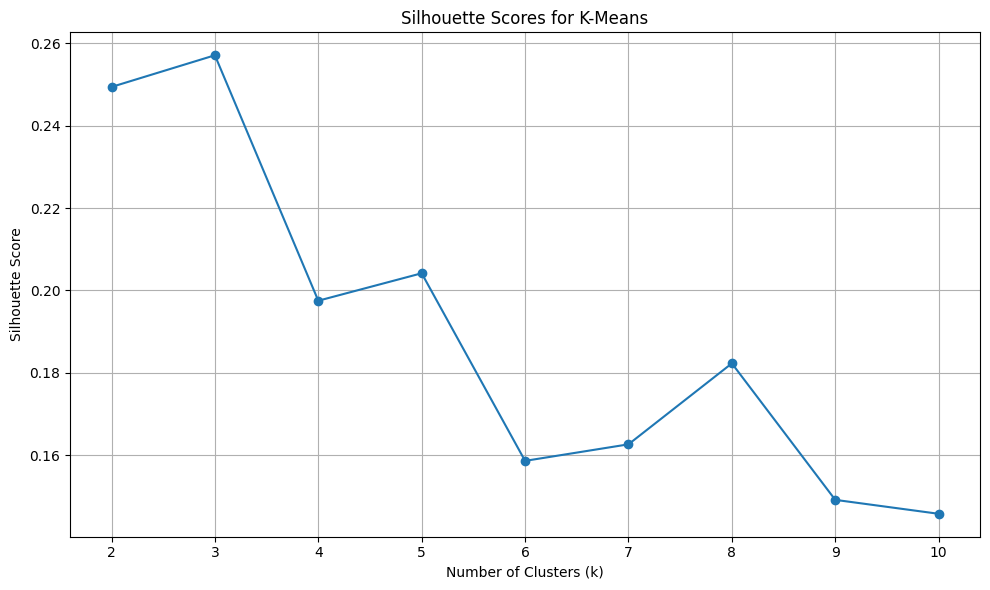

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# K-Means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

df = pd.read_csv('Merged_Data_Clean_6.11.25.csv.gz', compression='gzip', low_memory=False)

features = [
    'addr_state', 'debt-to-income_ratio', 'employment_length', 'fico_avg',
    'loan_amnt', 'purpose', 'fed_fund_effective_rate',
    'unemployment_rate', 'consumer_price_index'
]

X = df[features]
y = df['loan_status']

In [ ]:
categorical_features = ['addr_state', 'purpose']
numeric_features = [f for f in X.columns if f not in categorical_features]

scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

X = pd.get_dummies(X, drop_first=True)

/tmp/ipython-input-14-300964742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_features] = scaler.fit_transform(X[numeric_features])


In [ ]:
# Change k accordingly
k = 2
batch_size = 500
pca_batch_size = 10000

minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=batch_size, n_init=1)

In [ ]:
# Train MiniBatchKMeans in batches
for i in range(0, len(X), batch_size):
    X_batch = X.iloc[i:i + batch_size]
    minibatch_kmeans.partial_fit(X_batch)

# Predict cluster labels in batches
predicted_labels = np.zeros(len(X))
for i in range(0, len(X), batch_size):
    X_batch = X.iloc[i:i + batch_size]
    predicted_labels[i:i + batch_size] = minibatch_kmeans.predict(X_batch)

# Save predicted clusters
df['cluster'] = predicted_labels

In [ ]:
# Incremental PCA - 2 passes
ipca = IncrementalPCA(n_components=2, batch_size=pca_batch_size)

# First pass: fit PCA
for i in range(0, len(X), pca_batch_size):
    X_batch = X.iloc[i:i + pca_batch_size]
    ipca.partial_fit(X_batch)

# Second pass: transform data
X_pca = np.zeros((len(X), 2))  # Preallocate
for i in range(0, len(X), pca_batch_size):
    X_batch = X.iloc[i:i + pca_batch_size]
    X_pca[i:i + pca_batch_size] = ipca.transform(X_batch)

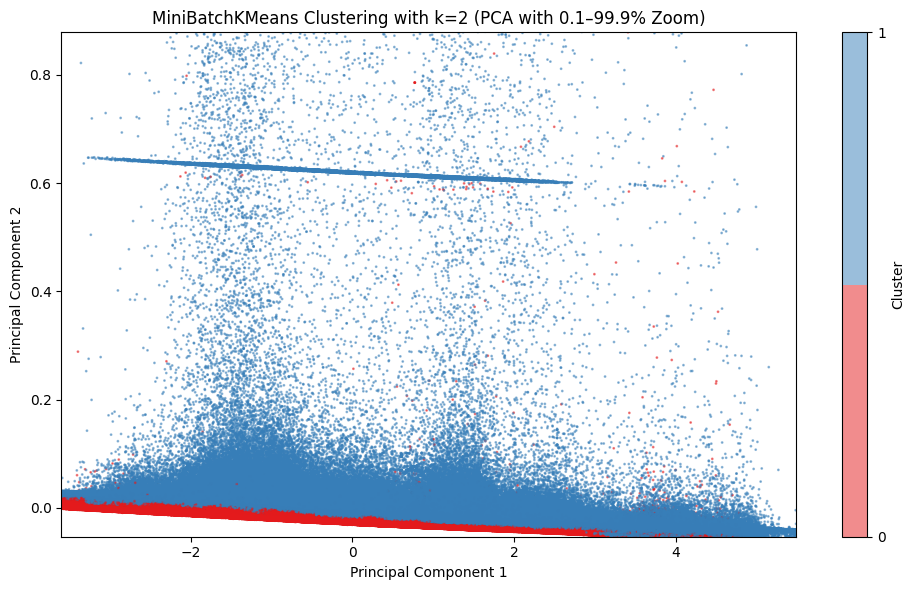

In [ ]:
x1, x2 = np.percentile(X_pca[:, 0], [0.1, 99.9])
y1, y2 = np.percentile(X_pca[:, 1], [0.1, 99.9])

# colormap
colors = plt.get_cmap('Set1').colors[:k]
cmap = ListedColormap(colors)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels.astype(int), cmap=cmap, s=1, alpha=0.5)
plt.xlim(x1, x2)
plt.ylim(y1, y2)
plt.title(f'MiniBatchKMeans Clustering with k={k} (PCA with 0.1–99.9% Zoom)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

cbar = plt.colorbar(scatter, ticks=range(k))
cbar.set_label('Cluster')

plt.tight_layout()
plt.show()

In [ ]:
ari = adjusted_rand_score(y, df['cluster'])
ami = adjusted_mutual_info_score(y, df['cluster'])

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Adjusted Mutual Information (AMI): {ami:.4f}")

Adjusted Rand Index (ARI): 0.4844
Adjusted Mutual Information (AMI): 0.2993
